# 5 Years of Crime Incidents
Cleaned by: Raymond Arevalo

In [296]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [297]:
import matplotlib.pyplot as plt
import h5py

# Loading files

In [298]:
dfIncidents = pd.read_csv('../incidents-5y.csv')
dfcode = pd.read_csv('nbrhcodes.csv')
dfzip = pd.read_csv('area_zip_dict.csv')

# Examining Data

In [299]:
# Examine Incidents data
print(dfIncidents.head(5))

   id        date  year  month   day  week  dow      time  hour  is_night  \
0 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
1 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
2 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
3 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
4 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   

     ...     comm_pop council council_pop  asr_zone lampdist        lat  \
0    ...            0    NONE           0       NaN      NaN  33.137756   
1    ...            0    NONE           0       NaN      NaN  32.630291   
2    ...            0    NONE           0       NaN      NaN  33.193405   
3    ...            0    NONE           0       NaN      NaN  32.655955   
4    ...            0    NONE           0       NaN      NaN  32.626110   

          lon         desc       gctype  gcquality  
0 -117.266499  PETTY THEFT  cns/s

In [300]:
# Examine Incidents data
print(dfcode.head(5))

           type      city    code  scode                   name         lon  \
0  neighborhood  CaSanSAN  SanADM    103            Adams North -117.119183   
1  neighborhood  CaSanSAN  SanALL     51         Allied Gardens -117.081694   
2  neighborhood  CaSanSAN  SanALT    119             Alta Vista -117.065998   
3  neighborhood  CaSanSAN  SanAZL     12  Azalea/Hollywood Park -117.104734   
4  neighborhood  CaSanSAN  SanBAL     89            Balboa Park -117.145920   

         lat          area  
0  32.768792  2.115885e+07  
1  32.797943  6.459816e+07  
2  32.693359  7.690619e+06  
3  32.732939  9.612716e+06  
4  32.731088  5.686434e+07  


In [301]:
# Examine Incidents data
print(dfzip.head(5))

            Area       Zipcode
0          Jamul        91935 
1    Wooded_Area        92106 
2       Old_Town        92110 
3  Spring_Valley  91977 91978 
4   Pauma_Valley        92061 


# Cleaning Data

In [302]:
# Grabs necessary crime data (year, type, neighborhood) dfIncidents[(dfIncidents.nbrhood != 'NONE')]
dfIncidents = dfIncidents[['year', 'type', 'city']]

In [303]:
dfIncidents.head(5)

year           type    city
0  2008  THEFT/LARCENY  SndCAR
1  2008          FRAUD  SndCHU
2  2008          FRAUD  SndOCN
3  2008          FRAUD  SndCHU
4  2008          FRAUD  SndCHU

In [304]:

dfIncidents.replace(to_replace='SndOCN', value = 'Oceanside', inplace = True)
dfIncidents.replace(to_replace='SndCHU', value = 'Chula_Vista', inplace = True)
dfIncidents.replace(to_replace='SndESC', value = 'Escondido', inplace = True)
dfIncidents.replace(to_replace='SndVIS', value = 'Vista', inplace = True)
dfIncidents.replace(to_replace='SndCAR', value = 'Carlsbad', inplace = True)
dfIncidents.replace(to_replace='SndLAM', value = 'La_Mesa', inplace = True)
dfIncidents.replace(to_replace='SndELC', value = 'El_Cajon', inplace = True)
dfIncidents.replace(to_replace='SndNAT', value = 'National_City', inplace = True)
dfIncidents.replace(to_replace='SndSNM', value = 'San_Marcos', inplace = True)
dfIncidents.replace(to_replace='SndSNT', value = 'Santee', inplace = True)
dfIncidents.replace(to_replace='SndENC', value = 'Encinitas', inplace = True)
dfIncidents.replace(to_replace='SndPOW', value = 'Poway', inplace = True)
dfIncidents.replace(to_replace='SndIMP', value = 'Imperial_Beach', inplace = True)
dfIncidents.replace(to_replace='SndDEL', value = 'Del_Mar', inplace = True)
dfIncidents.replace(to_replace='SndLEM', value = 'Lemon_Grove', inplace = True)
dfIncidents.replace(to_replace='SndCOR', value = 'Coronado', inplace = True)
dfIncidents.replace(to_replace='SndSOL', value = 'Solana_Beach', inplace = True)



In [305]:
# Remove irrelevant data

dfIncidents = dfIncidents[dfIncidents.type != 'DUI']
dfIncidents = dfIncidents[dfIncidents.type != 'DRUGS/ALCOHOL VIOLATIONS']
dfIncidents = dfIncidents[dfIncidents.type != 'VANDALISM']
dfIncidents = dfIncidents[dfIncidents.type != 'FRAUD']
dfIncidents = dfIncidents[dfIncidents.type != 'VEHICLE BREAK-IN/THEFT']
dfIncidents = dfIncidents[dfIncidents.type != 'WEAPONS']
dfIncidents = dfIncidents[dfIncidents.type != 'ASSAULT']
dfIncidents = dfIncidents[dfIncidents.type != 'SEX CRIMES']
dfIncidents = dfIncidents[dfIncidents.type != 'MOTOR VEHICLE THEFT']
dfIncidents = dfIncidents[dfIncidents.city != 'SndSAN']
dfIncidents = dfIncidents[dfIncidents.city != 'SndSDO']
dfIncidents = dfIncidents.reset_index()

del dfIncidents['index']
#del dfIncidents['level_0']


In [306]:
# Amount of Incidents throughout the years
print("Amount of incidents in 2008: " + str(len(dfIncidents[(dfIncidents.year == 2008) ])))
print("Amount of incidents in 2009: " + str(len(dfIncidents[(dfIncidents.year == 2009) ])))
print("Amount of incidents in 2010: " + str(len(dfIncidents[(dfIncidents.year == 2010) ])))
print("Amount of incidents in 2011: " + str(len(dfIncidents[(dfIncidents.year == 2011) ])))
print("Amount of incidents in 2012: " + str(len(dfIncidents[(dfIncidents.year == 2012) ])))

# How many Incidents we have for 5 years
print("Total amount of incidents: " + str(len(dfIncidents)))


Amount of incidents in 2008: 17664
Amount of incidents in 2009: 16319
Amount of incidents in 2010: 15641
Amount of incidents in 2011: 16013
Amount of incidents in 2012: 17225
Total amount of incidents: 82862


In [307]:
print(dfIncidents)

       year           type            city
0      2008  THEFT/LARCENY        Carlsbad
1      2008  THEFT/LARCENY       Oceanside
2      2008  THEFT/LARCENY       Oceanside
3      2008  THEFT/LARCENY     Chula_Vista
4      2008  THEFT/LARCENY     Chula_Vista
5      2008       BURGLARY        El_Cajon
6      2008  THEFT/LARCENY   National_City
7      2008       BURGLARY       Oceanside
8      2008  THEFT/LARCENY  Imperial_Beach
9      2008  THEFT/LARCENY       Oceanside
10     2008  THEFT/LARCENY       Escondido
11     2008  THEFT/LARCENY       Escondido
12     2008       BURGLARY           Vista
13     2008       BURGLARY           Vista
14     2008       BURGLARY      San_Marcos
15     2008  THEFT/LARCENY           Poway
16     2008       BURGLARY       Escondido
17     2008       BURGLARY       Oceanside
18     2008  THEFT/LARCENY       Escondido
19     2008  THEFT/LARCENY     Chula_Vista
20     2008  THEFT/LARCENY        Coronado
21     2008  THEFT/LARCENY        El_Cajon
22     2008

# Create new dataframe

In [308]:
# Sort values and group data by year and neighorhood to get total crimecount
dfIncidents = dfIncidents.sort_values(['year', 'city'], ascending=[True, True])
dfgroup = dfIncidents.groupby(["year", "city"]).size()


# Take series and convert to dataframe. Reset index and rename columns
dfsort = dfgroup.to_frame()
dfsort = dfsort.reset_index()
dfsort.columns = ['year', 'city', 'crimecount']

In [309]:
print(dfsort[dfsort.year == 2008])
print(len(dfsort))

    year            city  crimecount
0   2008        Carlsbad        1362
1   2008     Chula_Vista        3060
2   2008        Coronado         402
3   2008         Del_Mar         118
4   2008        El_Cajon        1386
5   2008       Encinitas         574
6   2008       Escondido        1809
7   2008  Imperial_Beach         273
8   2008         La_Mesa         879
9   2008     Lemon_Grove         411
10  2008   National_City        1418
11  2008       Oceanside        2503
12  2008           Poway         453
13  2008      San_Marcos         868
14  2008          Santee         584
15  2008    Solana_Beach         174
16  2008           Vista        1390
85


# Cleaning new data frame

In [310]:
columns = ['year', 'crimecount','zipcode']
dfAreas = pd.DataFrame(columns=columns) 


# Appends a new column that contains zip codes of each neighborhood
zips = []
for i in range(len(dfsort['city'])):
    name = dfsort['city'][i]
    for j in range(len(dfzip['Zipcode'])):
        area = dfzip['Area'][j]
        zipcode = dfzip['Zipcode'][j]
        if name == area:
            
            zipcode = zipcode.split(' ')
            zipcode.pop()
            
            dfAreas.loc[len(dfAreas)]=[int(dfsort['year'][i]), int(dfsort['crimecount'][i]), zipcode[0]] 


            

In [311]:
# sort by zipcode
dfAreas = dfAreas.sort_values(['zipcode', 'year'],ascending = [True, True])

# Resets index
dfAreas = dfAreas.reset_index()
del dfAreas['index']
dfAreas.year = dfAreas.year.astype(int)
dfAreas.crimecount = dfAreas.crimecount.astype(int)
print(dfAreas)

    year  crimecount zipcode
0   2008        3060   91910
1   2009        2750   91910
2   2010        2560   91910
3   2011        2815   91910
4   2012        2766   91910
5   2008         273   91932
6   2009         215   91932
7   2010         185   91932
8   2011         195   91932
9   2012         201   91932
10  2008         879   91941
11  2009         901   91941
12  2010         950   91941
13  2011         803   91941
14  2012        1074   91941
15  2008         411   91945
16  2009         334   91945
17  2010         345   91945
18  2011         241   91945
19  2012         294   91945
20  2008        1418   91950
21  2009        1286   91950
22  2010        1167   91950
23  2011        1256   91950
24  2012        1430   91950
25  2008        1362   92008
26  2009        1197   92008
27  2010        1138   92008
28  2011        1202   92008
29  2012        1264   92008
..   ...         ...     ...
55  2008         453   92064
56  2009         424   92064
57  2010      

# Creating Breads

In [338]:

year_range = dfAreas['year'].value_counts()
years = len(year_range)
year_list = list(year_range.keys())
year_list = sorted(year_list, key=int)   

zip_range = dfAreas['zipcode'].value_counts()
zip_num = len(zip_range)
zip_list = list(zip_range.keys())
zip_list = sorted(zip_list, key = int)
year_list

#print(dfAreas)
#zip_list
#print(type(year_range))
print(years)
print(zip_num)
print(zip_list)



5
17
['91910', '91932', '91941', '91945', '91950', '92008', '92014', '92019', '92024', '92025', '92054', '92064', '92069', '92071', '92075', '92081', '92118']


In [341]:

# Creates bread for all of the years
crimebread = np.zeros((years,zip_num))
for i in range(years):
    for zips in zip_list:
        crimebread[i][:] = dfAreas['crimecount'][dfAreas['year'] == year_list[i]]
        print(dfAreas['crimecount'][dfAreas['year'] == year_list[i]])
        print("----")
    
# Creates bread for just one year
crimeslice = crimebread[4][:]


# Creates 3D bread
crimebread3D = np.zeros((years, 2, zip_num), dtype=np.int)
for i in range(years):   
    for zips in zip_list:
        #extracts all crime counts with corresponding year in dfsort data and inserts into array of crimebread
        crimebread3D[i][0][:] = dfAreas['crimecount'][dfsort['year'] == year_list[i]]
    for j in range(len(zip_list)):
        crimebread3D[i][1][j] = int(zip_list[j])
        


0     3060
5      273
10     879
15     411
20    1418
25    1362
30     118
35    1386
40     574
45    1809
50    2503
55     453
60     868
65     584
70     174
75    1390
80     402
Name: crimecount, dtype: int64
----
0     3060
5      273
10     879
15     411
20    1418
25    1362
30     118
35    1386
40     574
45    1809
50    2503
55     453
60     868
65     584
70     174
75    1390
80     402
Name: crimecount, dtype: int64
----
0     3060
5      273
10     879
15     411
20    1418
25    1362
30     118
35    1386
40     574
45    1809
50    2503
55     453
60     868
65     584
70     174
75    1390
80     402
Name: crimecount, dtype: int64
----
0     3060
5      273
10     879
15     411
20    1418
25    1362
30     118
35    1386
40     574
45    1809
50    2503
55     453
60     868
65     584
70     174
75    1390
80     402
Name: crimecount, dtype: int64
----
0     3060
5      273
10     879
15     411
20    1418
25    1362
30     118
35    1386
40     574
45    180

# Visualizing Data

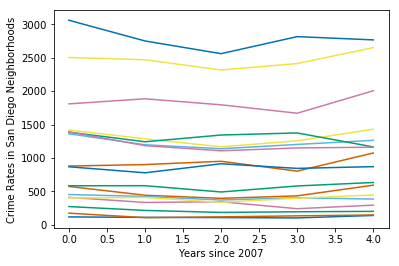

In [314]:
# Graph crime rates throughout years 2007 - 2012 for all San Diego City Neighborhoods
plt.xlabel('Years since 2007')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(crimebread[:][:])


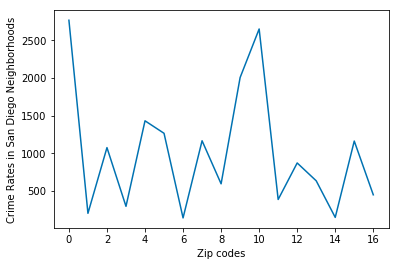

In [315]:
# Graph crime rates in 2012 for all San Diego City Neighborhoods
plt.xlabel('Zip codes')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(crimeslice[:][:])

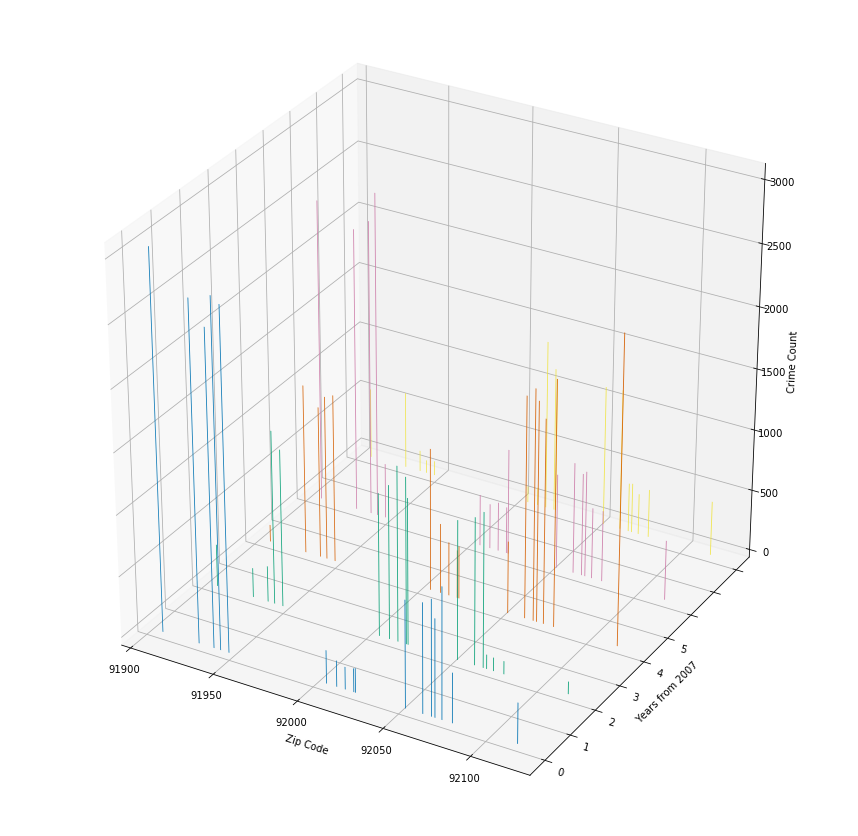

In [317]:
# Graphs the 3D slice of bread

numcr = []
for i in range(len(year_list)):
    numcr.append(list(crimebread3D[i][0][:]))

x = list(crimebread3D[0][1][:])



fig = plt.figure(1, figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
#['r', 'g', 'b', 'y', 'r', 'g']
idk = [0, 1, 2, 3 , 4, 5]

for c, f in zip(['r', 'g', 'b', 'y', 'r'], [0, 1, 2, 3, 4]):
    xs = x #zipcode
    z = numcr[f]
    ax.bar(xs, z, f, zdir = 'y', alpha = .9, width = .5)

ax.set_xlabel('Zip Code') 
ax.set_ylabel('Years from 2007') 
ax.set_zlabel('Crime Count') 
#ax.set_yticks([2007, 2008, 2009, 2010, 2011, 2012])
#ax.set_yticklabels()
labels = {}
for l_c in range(0,6):
    labels[l_c] = 'This is not normal'

ax.set_yticklabels(labels, rotation = -15, verticalalignment = 'baseline', horizontalalignment = 'left')
plt.show()



In [320]:
# Sum total number of crimes in San Diego city for each year
year_range = [2008, 2009, 2010, 2011, 2012]
total_2008 = np.sum(crimebread[:][0])
total_2009 = np.sum(crimebread[:][1])
total_2010 = np.sum(crimebread[:][2])
total_2011 = np.sum(crimebread[:][3])
total_2012 = np.sum(crimebread[:][4])

totalcrime = [total_2008, total_2009, total_2010, total_2011, total_2012]
print(totalcrime)

[17664.0, 16319.0, 15641.0, 16013.0, 17225.0]


<Container object of 17 artists>

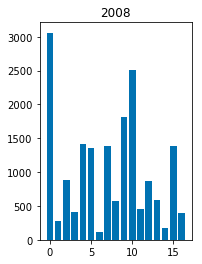

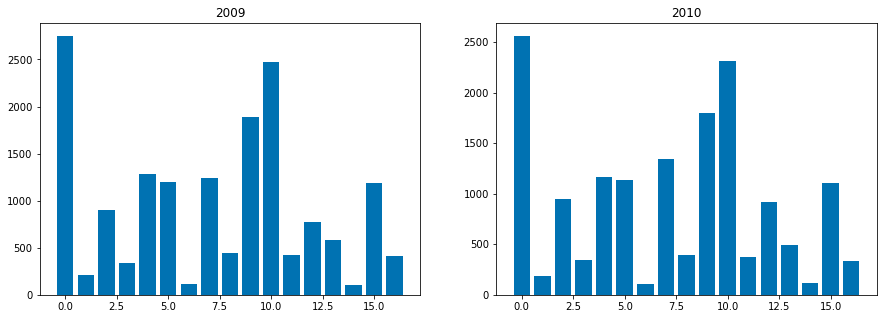

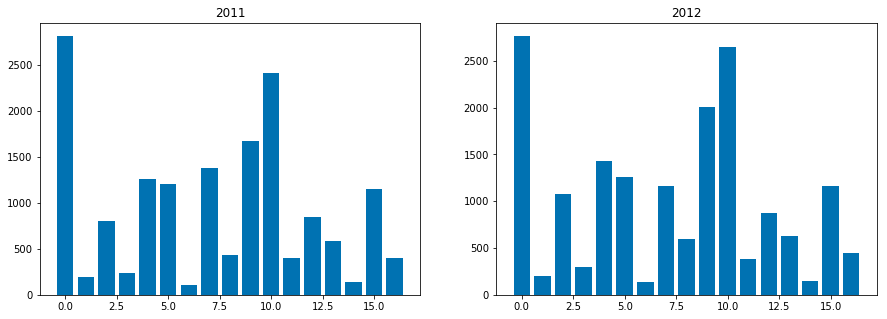

In [322]:
# prices across zipcodes color = each year
plt.xlabel('zipcodes')
plt.ylabel('crime rates in SD neighborhoods')
zipcrime_2008 = []
zipcrime_2009 = []
zipcrime_2010 = []
zipcrime_2011 = []
zipcrime_2012 = []

for j in range(len(crimebread)):
    for i in range(len(crimebread[j])):
        if j == 0:
            zipcrime_2008.append(crimebread[j][i])
        if j == 1:
            zipcrime_2009.append(crimebread[j][i])
        if j == 2:
            zipcrime_2010.append(crimebread[j][i])
        if j == 3:
            zipcrime_2011.append(crimebread[j][i])
        if j == 4:
            zipcrime_2012.append(crimebread[j][i])



plt.subplot(1,2,2)
plt.title(year_list[0])
plt.bar(list(range(len(zip_list))), zipcrime_2008)

plt.figure(2,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(year_list[1])
plt.bar(list(range(len(zip_list))), zipcrime_2009)
plt.subplot(1,2,2)
plt.title(year_list[2])
plt.bar(list(range(len(zip_list))), zipcrime_2010)

plt.figure(3,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(year_list[3])
plt.bar(list(range(len(zip_list))), zipcrime_2011)
plt.subplot(1,2,2)
plt.title(year_list[4])
plt.bar(list(range(len(zip_list))), zipcrime_2012)

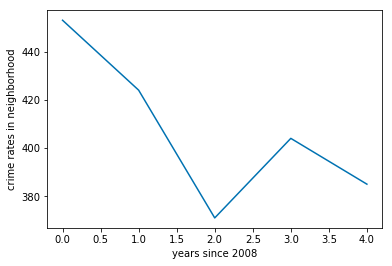

In [323]:

# accessing by each zipcode
plt.xlabel('years since 2008')
plt.ylabel('crime rates in neighborhood')
# color: each zipcode
_ = plt.plot(crimebread.T[:][11]) #La Jolla



# Exporting Data

In [324]:
import matplotlib.pyplot as plt
import h5py

#### cogs108h5 = h5py.File('cogs108.h5', 'a')
#### cogs108h5.create_dataset('county_crime_avg_5y', data = crimebread3D )
#### cogs108h5.close()



In [327]:
bread = []
#load data from h5 
h5_file = '../COGS108-Gentrification/cogs108.h5'
#reading data
with h5py.File(h5_file, 'r') as h5:
    #print([x for x in h5.keys()])
    dset = h5['county_crime_avg_5y']
    bread = dset[:][:]